1. Covid-19_Viral_Pneumonia Dataset Images at:
https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset

In [6]:

from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
from pathlib import Path
import numpy as np
import pandas as pd


2. Loading Train and Validation Images Dataset

In [18]:
BATCH_SIZE = 8
PIC_SIZE = 256

train_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255, rotation_range=20,
                                                            width_shift_range = 0.1,
                                                            height_shift_range = 0.1, shear_range= 15,
                                                            zoom_range= [0.5, 1.5])

validation_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train = train_data.flow_from_directory("./Covid19-dataset/train", target_size=(PIC_SIZE,PIC_SIZE), batch_size=BATCH_SIZE, class_mode="categorical", color_mode='grayscale')
validation = validation_data.flow_from_directory("./Covid19-dataset/test", target_size=(PIC_SIZE,PIC_SIZE), batch_size=BATCH_SIZE, class_mode="categorical", color_mode='grayscale')

print(train.class_indices)
print(validation.class_indices)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}
{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}


3. Model Structure

In [22]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(PIC_SIZE, PIC_SIZE, 1), kernel_initializer = "he_normal", strides=1,
padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding="same"))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu',  kernel_regularizer = tf.keras.regularizers.l2(0.01), kernel_initializer = "he_normal", strides=1,
padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding="same"))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu',  kernel_regularizer = tf.keras.regularizers.l2(0.01), kernel_initializer = "he_normal", strides=1,
padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding="same"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.01), kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.01), kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.01), kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

4. Compiling and Training the Model

In [23]:
model.compile(
    optimizer=tf.keras.optimizers.experimental.Nadam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['acc']
)
    
history = model.fit(train,   
    epochs=40, 
    validation_data=validation)

print("Model Trained")

Epoch 1/40
32/32 [==============================] - 14s 386ms/step - loss: 17.7026 - acc: 0.3865 - val_loss: 14.0936 - val_acc: 0.6515
Epoch 2/40
32/32 [==============================] - 14s 422ms/step - loss: 12.6471 - acc: 0.5618 - val_loss: 11.2558 - val_acc: 0.6212
Epoch 3/40
32/32 [==============================] - 13s 396ms/step - loss: 10.3298 - acc: 0.6096 - val_loss: 9.5577 - val_acc: 0.6061
Epoch 4/40
32/32 [==============================] - 13s 410ms/step - loss: 8.8750 - acc: 0.6375 - val_loss: 8.2964 - val_acc: 0.6212
Epoch 5/40
32/32 [==============================] - 14s 427ms/step - loss: 7.7700 - acc: 0.5976 - val_loss: 7.1977 - val_acc: 0.5909
Epoch 6/40
32/32 [==============================] - 14s 433ms/step - loss: 6.7129 - acc: 0.6454 - val_loss: 6.5027 - val_acc: 0.6667
Epoch 7/40
32/32 [==============================] - 13s 414ms/step - loss: 6.0070 - acc: 0.6653 - val_loss: 5.9255 - val_acc: 0.6515
Epoch 8/40
32/32 [==============================] - 14s 421ms/st

5. Accuracy and Loss Graphic

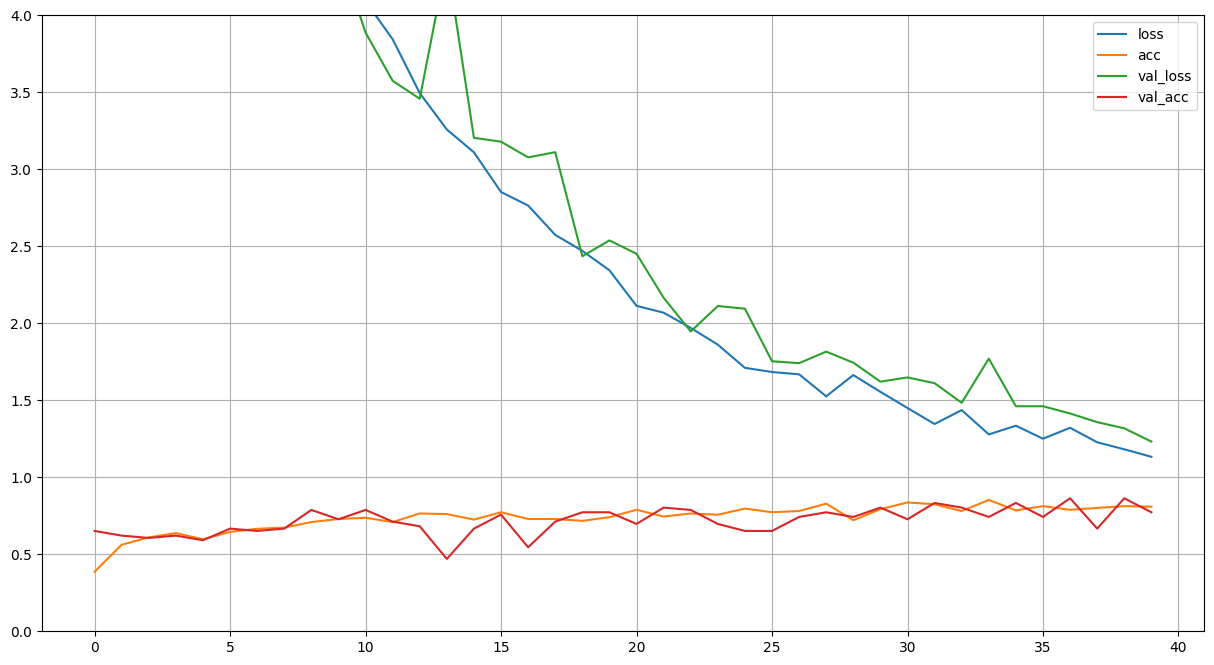

In [24]:
pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,4)
plt.show()

6. Testing the Model

1/1 [==============================] - 0s 78ms/step
[[1. 0. 0.]]
The Patient has Covid


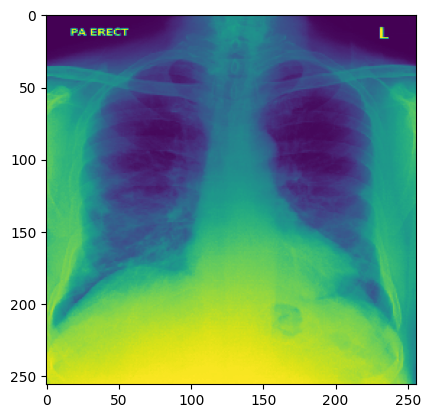

In [28]:
test_img = tf.keras.preprocessing.image.load_img("./0102.JPEG", target_size=(256, 256), color_mode='grayscale')

plt.imshow(test_img)


X = tf.keras.preprocessing.image.img_to_array(test_img)
X = np.expand_dims(X, axis = 0)

prediction = np.vstack([X])

result = model.predict(prediction)

print(result)

arg_max_result = np.argmax(result)

if arg_max_result == 0 :
    print("The Patient has Covid")
elif arg_max_result == 1 :
    print("The Patient has a Normal X-Ray")
elif arg_max_result == 2 :
    print("The Patient has Viral Pneumonia")
